In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

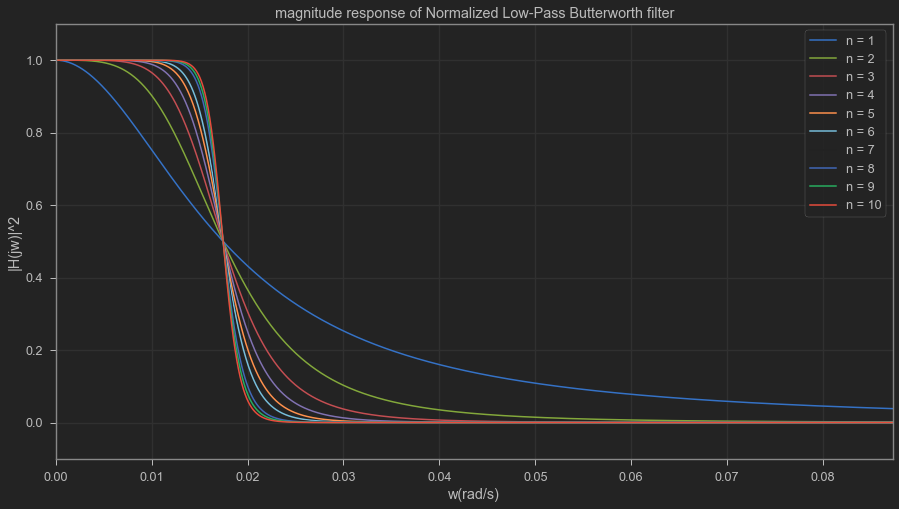

In [2]:
# Magnitude Response of Normalized Low-Pass Butterworth Filter
def ABS_Hjw_pow2 (w, n):
    return 1/(1 + np.power(w, 2*n))

x = np.linspace(0, 5, 1000)
plt.figure(0, figsize=(15, 8))

for i in np.arange(1, 11):
    plt.plot(x*(np.pi/180), ABS_Hjw_pow2(x, i), label='n = {}'.format(i))

plt.grid('on')
plt.xlabel('w(rad/s)')
plt.ylabel('|H(jw)|^2')
plt.title('magnitude response of Normalized Low-Pass Butterworth filter')
plt.margins(0, 0.1)
plt.legend()
plt.show(plt.figure(0))

[1.e+16]
[1.00000000e+00 5.12583090e+02 1.31370712e+05 2.18461510e+07
 2.56883559e+09 2.18461510e+11 1.31370712e+13 5.12583090e+14
 1.00000000e+16]


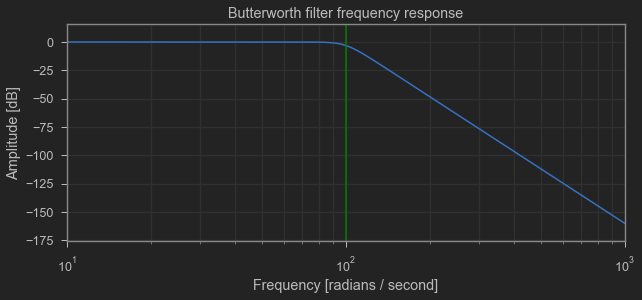

<Figure size 432x288 with 0 Axes>

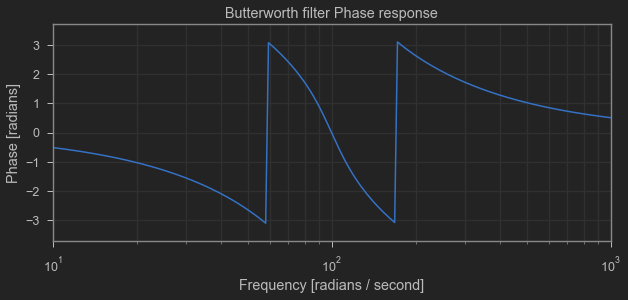

In [3]:
# Frequency and Phase Response of Low-Pass Butterworth Filter
b, a = sig.butter(8, 100, 'low', analog=True)

w, h = sig.freqs(b, a)
print(b)
print(a)
plt.figure(11, figsize=(10,4))
plt.semilogx(w, 20 * np.log10(abs(h)))
plt.title('Butterworth filter frequency response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(100 ,color='green') # cutoff frequency
plt.show(plt.figure(1))


plt.figure(2, figsize=(10,4))
plt.semilogx(w, np.arctan2(np.imag(h), np.real(h)))
plt.title('Butterworth filter Phase response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Phase [radians]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.show(plt.figure(2))

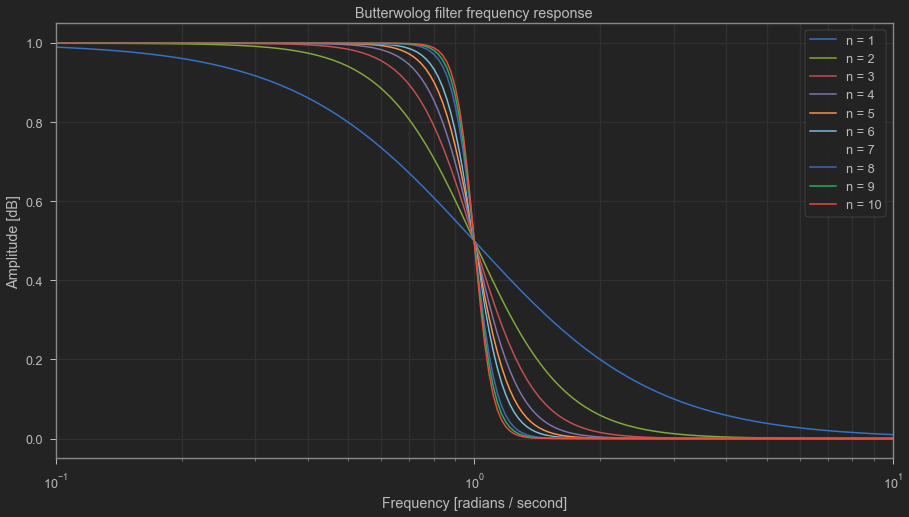

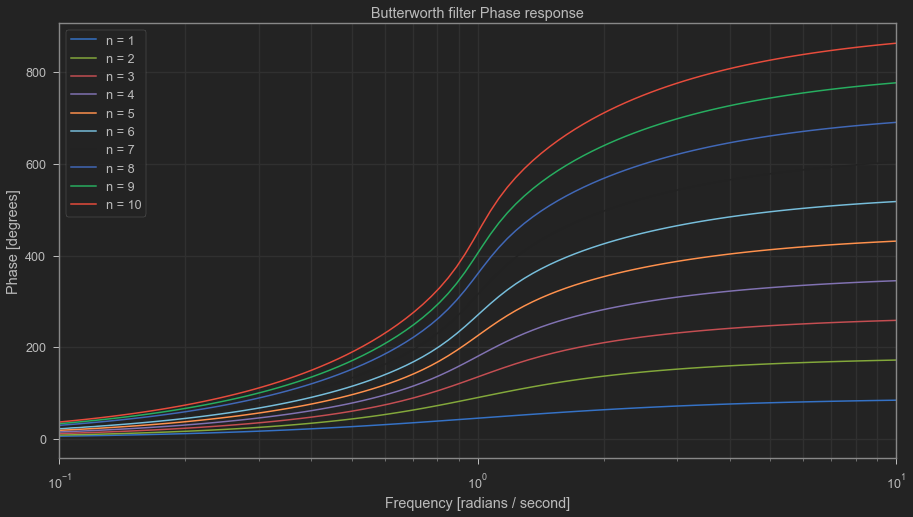

In [4]:
# Frequency and Phase Response of Low-Pass Butterworth Filter
def func(n):
    b, a = sig.butter(n, 1, 'low', analog=True)
    w, h = sig.freqs(b, a)
    return (w, h)

def func2(n):
    b, a = sig.butter(n, 1, 'low', analog=True)
    sys = sig.TransferFunction(b, a)
    w, mag, phase = sig.bode(sys)
    return (w, phase)

plt.figure(1, figsize=(15,8))
for i in np.arange(1, 11):
    w, h=func(i)
    plt.semilogx(w, np.power(abs(h), 2), label='n = {}'.format(i))
plt.title('Butterwolog filter frequency response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.xlim([0.1, 10])
plt.grid(which='both', axis='both')
plt.axvline(100 ,color='green') # cutoff frequency
plt.legend()
plt.show(plt.figure(1))

plt.figure(2, figsize=(15,8))
for i in np.arange(1, 11):
    w, phase = func2(i)
    plt.semilogx(w, -phase, label='n = {}'.format(i))

plt.title('Butterworth filter Phase response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Phase [degrees]')
plt.xlim([0.1, 10])
plt.grid(which='both', axis='both')
plt.legend()
plt.show(plt.figure(2))

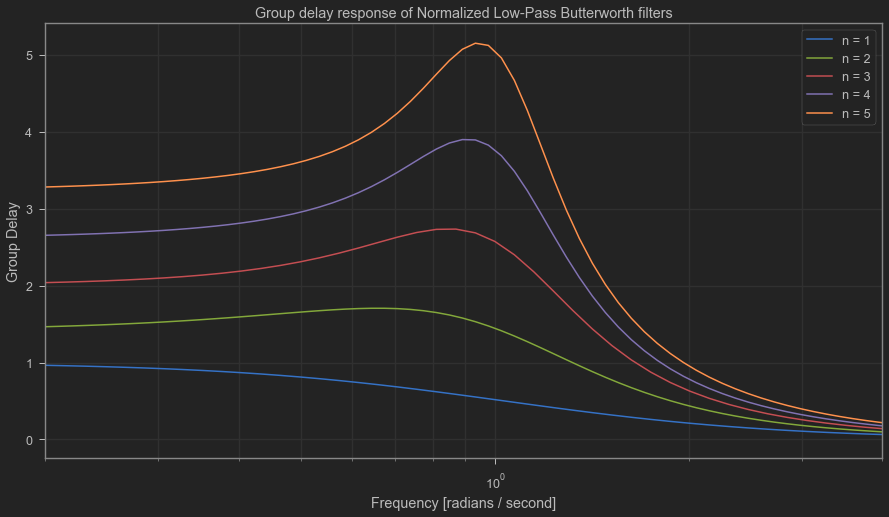

In [5]:
# Group delay Response of Normalized Low-Pass Butterworth Filters
plt.figure(3, figsize=(15,8))
for i in range(1,6):
    b, a = sig.butter(i, 1, 'low', analog=True, output='ba')
    sys = sig.TransferFunction(b, a)
    w, mag, phase = sig.bode(sys)
    group_delay = -np.diff(phase*np.pi/180) / np.diff(w)
    plt.semilogx(w[1:], group_delay, label='n = {}'.format(i))

plt.title('Group delay response of Normalized Low-Pass Butterworth filters')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Group Delay')
plt.xlim([0.2, 4])
plt.grid(which='both', axis='both')
plt.legend()
plt.show(plt.figure(3))

4
21.386781124990467


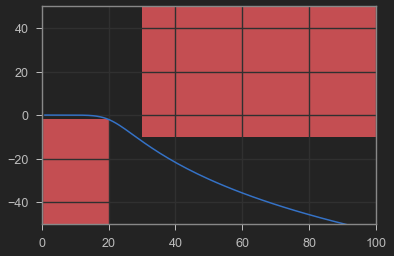

In [6]:
# Simple Example 
wpass = 20
wstop = 30
n, ws = sig.buttord(wpass, wstop, 2, 10, analog=True)
b, a = sig.butter(n, ws, 'low', analog=True)
w, h = sig.freqs(b, a)
print(n)
print(ws)
plt.plot(w, 20 * np.log10(abs(h)))
plt.fill([0,wpass,wpass,0],[-2,-2,-99,-99],color='r',lw=0)
plt.fill([wstop,100,100,wstop],[-10,-10,100,100],color='r',lw=0)
plt.axis([0, 100, -50, 50])
plt.grid(which='both', axis='both')
plt.show()